In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv("/content/flight_delay_predict.csv")

In [3]:
data.head()

,is_delay,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,AirTime
0,1.0,2014,1,1,1,3,2014-01-01,UA,LAX,CA,ORD,IL,900,0.0,0.0,1744.0,7,43.0,43.0,218.0
1,0.0,2014,1,1,1,3,2014-01-01,AA,IAH,TX,DFW,TX,1750,0.0,0.0,224.0,1,2.0,2.0,50.0
2,1.0,2014,1,1,1,3,2014-01-01,AA,LAX,CA,ORD,IL,1240,0.0,0.0,1744.0,7,26.0,26.0,220.0
3,1.0,2014,1,1,1,3,2014-01-01,AA,DFW,TX,LAX,CA,1905,0.0,0.0,1235.0,5,159.0,159.0,169.0
4,0.0,2014,1,1,1,3,2014-01-01,AA,DFW,TX,CLT,NC,1115,0.0,0.0,936.0,4,-13.0,0.0,108.0


In [4]:
data.shape

(1635590, 20)

In [5]:
data.duplicated().sum()

np.int64(3)

In [6]:
data.isnull().sum()

,0
is_delay,0
Year,0
Quarter,0
Month,0
DayofMonth,0
DayOfWeek,0
FlightDate,0
Reporting_Airline,0
Origin,0
OriginState,0


In [7]:
label_encoder = LabelEncoder()

data['Origin'] = label_encoder.fit_transform(data['Origin'])
data['Dest'] = label_encoder.fit_transform(data['Dest'])

print(data.dtypes)

is_delay             float64
Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                 int64
OriginState           object
Dest                   int64
DestState             object
CRSDepTime             int64
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
AirTime              float64
dtype: object


In [8]:
avg_delay_by_origin = data.groupby('Origin')['ArrDelay'].mean().reset_index()

bar_plot = px.bar(avg_delay_by_origin, x='Origin', y='ArrDelay', title='Average Arrival Delay by Origin Airport')
bar_plot.update_layout(xaxis_title='Origin Airport', yaxis_title='Average Arrival Delay')

bar_plot.show()

In [9]:
avg_delay_by_dest = data.groupby('Dest')['ArrDelay'].mean().reset_index()

bar_plot_dest = px.bar(avg_delay_by_dest, x='Dest', y='ArrDelay', title='Average Arrival Delay by Destination Airport')
bar_plot_dest.update_layout(xaxis_title='Destination Airport', yaxis_title='Average Arrival Delay')

bar_plot_dest.show()

<Axes: >

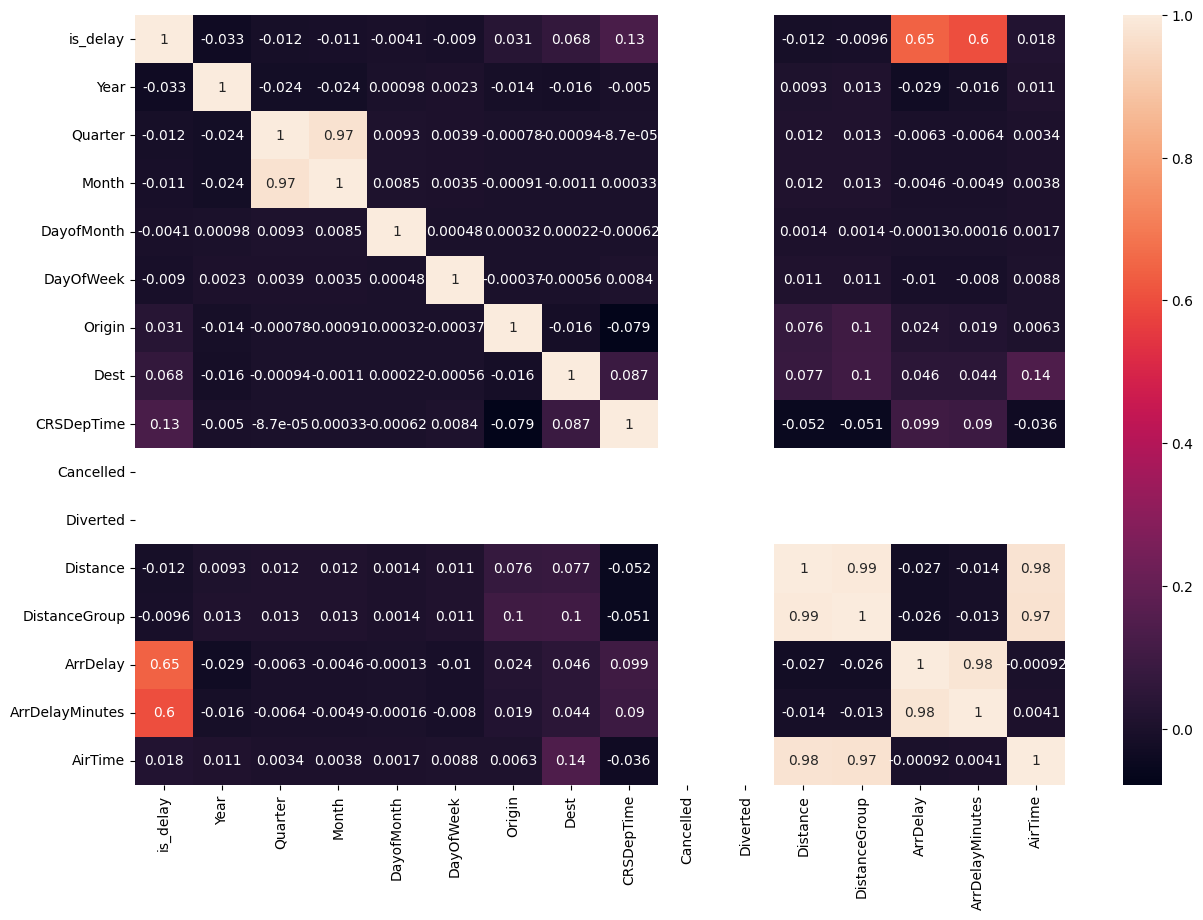

In [10]:
numeric_data = data.select_dtypes(include=['number'])

corr_matrix = numeric_data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot = True)

In [11]:
data['FlightDate'] = pd.to_datetime(data['FlightDate'])

avg_delay_month = data.groupby(data['FlightDate'].dt.month)['is_delay'].mean().reset_index()
fig = px.bar(avg_delay_month, x='FlightDate', y='is_delay', labels={'FlightDate': 'Month', 'is_delay': 'Average Delay'},
             title='Average Delay by Month')
fig.update_traces(marker_color='skyblue')
fig.show()

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model

# Splitting the data into training and testing sets
X = data[['AirTime', 'Distance']]   # using dataset's Distance directly
y = data[['ArrDelayMinutes', 'is_delay']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='linear'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

# Evaluating the model
score, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)
print('Test accuracy:', accuracy)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/5
40890/40890 ━━━━━━━━━━━━━━━━━━━━ 95s 2ms/step - accuracy: 0.9971 - loss: 785.4133
Epoch 2/5
40890/40890 ━━━━━━━━━━━━━━━━━━━━ 139s 2ms/step - accuracy: 1.0000 - loss: 781.1058
Epoch 3/5
40890/40890 ━━━━━━━━━━━━━━━━━━━━ 87s 2ms/step - accuracy: 1.0000 - loss: 784.2629
Epoch 4/5
40890/40890 ━━━━━━━━━━━━━━━━━━━━ 88s 2ms/step - accuracy: 1.0000 - loss: 763.9333
Epoch 5/5
40890/40890 ━━━━━━━━━━━━━━━━━━━━ 93s 2ms/step - accuracy: 1.0000 - loss: 782.9159
Test loss: 729.3052978515625
Test accuracy: 1.0


In [13]:
import pickle

with open('/kaggle/working/model.pkl', 'wb') as f:
    pickle.dump({'model_path': '/kaggle/working/model.h5', 'scaler': scaler}, f)

print("Model and scaler saved as model.pkl")


Model and scaler saved as model.pkl


In [ ]:
import numpy as np


def haversine(lat1, lon1, lat2, lon2):
    R = 6371  
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c


    {"JFK": (40.6413, -73.7781),
    "LAX": (33.9416, -118.4085),
    "ORD": (41.9742, -87.9073),
    "DFW": (32.8998, -97.0403),
    "ATL": (33.6407, -84.4277),
}

def predict_delay():
    
    reporting_airline = input("Enter Reporting Airline code (e.g. AA): ").strip().upper()
    origin = input("Enter Origin airport code (e.g. JFK): ").strip().upper()
    dest = input("Enter Destination airport code (e.g. LAX): ").strip().upper()
    airtime = float(input("Enter AirTime (minutes): "))

   
    data['Origin'] = data['Origin'].astype(str).str.strip().str.upper()
    data['Dest'] = data['Dest'].astype(str).str.strip().str.upper()

    
    row = data[(data['Origin'] == origin) & (data['Dest'] == dest)]

    if not row.empty:
        distance = row['Distance'].mode()[0]  
        print(f"Found route in dataset. Distance: {distance} miles")
    else:
       
        if origin in airport_coords and dest in airport_coords:
            lat1, lon1 = airport_coords[origin]
            lat2, lon2 = airport_coords[dest]
            distance = haversine(lat1, lon1, lat2, lon2) * 0.621371  
            print(f"Route not in dataset, calculated distance: {distance:.2f} miles")
        else:
            print("Route not found and coordinates missing!")
            return None

   
    X_new = pd.DataFrame([[airtime, distance]], columns=['AirTime', 'Distance'])
    X_new_scaled = scaler.transform(X_new)


    prediction = model.predict(X_new_scaled)
    delay_minutes = prediction[0][0]
    is_delay_prob = prediction[0][1]

    print("\n===== Prediction Result =====")
    print(f"Predicted Delay Minutes: {delay_minutes:.2f}")
    print(f"Probability of Delay: {is_delay_prob:.2f}")
predict_delay()


Enter Reporting Airline code (e.g. AA): UA
Enter Origin airport code (e.g. JFK): LAX
Enter Destination airport code (e.g. LAX): ORD
Enter AirTime (minutes): 5000
⚠️ Route not in dataset, calculated distance: 1741.04 miles
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

===== Prediction Result =====
Predicted Delay Minutes: 6808.39
Probability of Delay: 110.94
